In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-zipcode-database/zip_code_database.csv


In [2]:
zip_code_data = pd.read_csv("../input/us-zipcode-database/zip_code_database.csv")


zip_code_data1 = zip_code_data[["zip","latitude","longitude","state"]]
zip_code_data1.head()
zip_code_data1.isnull().sum()

zip          0
latitude     0
longitude    0
state        0
dtype: int64

In [3]:
zip_code_data1 =zip_code_data1.dropna()
zip_code_data1

,zip,latitude,longitude,state
0,501,40.81,-73.04,NY
1,544,40.81,-73.04,NY
2,601,18.16,-66.72,PR
3,602,18.38,-67.18,PR
4,603,18.43,-67.15,PR
...,...,...,...,...
42627,99926,55.14,-131.49,AK
42628,99927,56.30,-133.57,AK
42629,99928,55.45,-131.79,AK
42630,99929,56.41,-131.61,AK


In [4]:
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='PR'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='HI'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='AS'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='GU'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='VI'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='MP'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='Ak'].index, inplace=True)


In [5]:
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='Ak'].index, inplace=True)

(24.0, 50.0)

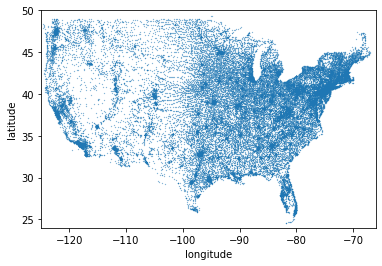

In [6]:
zip_code_data1.plot.scatter(x='longitude', y='latitude', s = 0.05)
axis = plt.gca()
axis.set_xlim([-125,-66])
axis.set_ylim([24,50])


In [7]:
from sklearn.preprocessing import LabelEncoder
X = zip_code_data1

y = zip_code_data1['state']
le = LabelEncoder()

X['state'] = le.fit_transform(X['state'])

y = le.transform(y)

In [8]:
x=zip_code_data1.iloc[:,[2,3]].values
x.shape

(42284, 2)

new section

In [9]:
clustering = DBSCAN(eps=17, min_samples=10).fit(zip_code_data1)
DBSCAN_dataset = zip_code_data1.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [10]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
-1,801
628,484
307,471
211,401
356,373
...,...
71,10
608,9
173,9
61,9


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-125.0, -66.0)

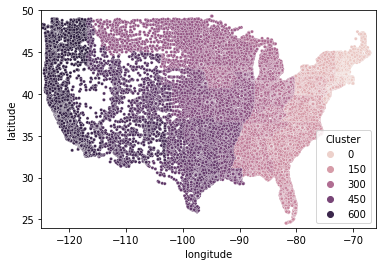

In [11]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
sns.scatterplot('longitude', 'latitude',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster',s=10, c="k")
plt.ylim(24,50)
plt.xlim(-125,-66)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


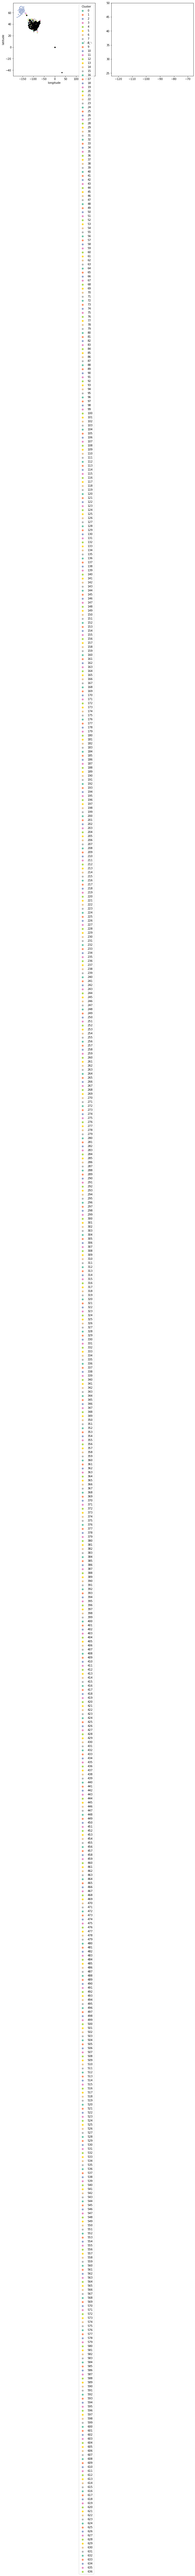

In [12]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('longitude', 'latitude',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=10)


axes[0].scatter(outliers['longitude'], outliers['latitude'], s=10, label='outliers', c="k")

plt.ylim(24,50)
plt.xlim(-125,-66)

plt.show()